# EDA

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [2]:
# Reading in the data
df = pd.read_csv('../data/genre_clean.csv')

In [3]:
# Taking a look at the data
df.head()

,files,zero_crossing_rate,spectral_centroid,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,labels,y
0,pop.00027.wav,0.101867,2682.251387,5955.912452,-75.310120,83.352333,10.692239,14.464298,14.244169,7.392612,5.275318,-0.394537,5.729705,3.368037,-2.524067,-4.216263,-1.839258,pop,8
1,pop.00033.wav,0.137010,2835.103815,5944.979313,-68.928207,73.759949,-12.472088,9.549262,-0.037814,12.726260,3.162044,-0.072349,2.534841,2.882886,-1.671194,-3.015886,1.618294,pop,8
2,pop.00032.wav,0.228641,4225.533439,8483.474172,-113.112213,41.596046,21.518061,11.100333,17.437881,0.610943,3.028697,0.086027,3.453746,0.289805,0.620056,1.260636,2.900202,pop,8
3,pop.00026.wav,0.103494,2525.419447,5552.776916,-73.322212,97.488853,16.858400,-0.587017,7.188521,4.874156,0.759747,-5.546975,1.001608,4.935908,-5.822525,-4.918010,-0.025517,pop,8
4,pop.00030.wav,0.148679,3070.608038,6653.027004,-18.115849,72.282204,-4.890480,-0.378657,1.685867,-0.925050,-1.330334,-0.343852,0.651997,-0.186307,-1.225008,-1.049567,2.526758,pop,8


In [4]:
# Looking at some descriptive statistics
df.describe()

,zero_crossing_rate,spectral_centroid,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.103612,2201.780898,4571.549304,-144.472987,99.554278,-8.920291,36.292447,-1.144840,14.633491,-5.129038,10.119172,-6.994062,7.729784,-6.021069,4.471693,-4.795884,5.500000
std,0.041821,715.960600,1574.791602,100.229406,31.330873,21.690676,16.664665,12.221340,11.839591,9.940460,10.463270,8.283921,7.937309,6.817013,6.715787,6.170181,2.873719
min,0.021697,570.040355,749.140636,-552.120056,-1.461542,-89.870193,-18.727547,-38.890350,-28.415911,-32.930431,-24.915823,-31.640574,-12.050179,-28.057501,-15.796446,-27.523129,1.000000
25%,0.070244,1627.697311,3380.069642,-200.763893,76.779915,-24.219811,24.108213,-9.979157,5.098573,-12.870810,1.609182,-13.246939,1.620753,-10.964134,-0.547370,-9.357905,3.000000
50%,0.099503,2209.263090,4658.524473,-120.286385,98.458744,-10.707894,36.960085,-0.022276,15.006957,-5.714962,9.668148,-7.517393,7.127483,-5.924517,3.875856,-4.198379,5.500000
75%,0.131944,2691.294667,5533.810460,-73.913042,119.954811,5.505812,48.216259,7.928092,23.851868,2.975042,18.710624,-0.380487,14.383610,-1.029847,9.706858,-0.159545,8.000000
max,0.274631,4435.243901,8677.672688,42.039433,193.097397,56.682800,80.702301,31.440584,45.173176,21.827339,49.011356,19.133009,27.212437,17.421560,23.034859,13.051313,10.000000


## Plotting Mel Spectrograms

In [17]:
def plot_spectrogram(genre):
    '''
    This function takes in a list of genres and plots a mel spectrogram for one song 
    per genre.
    '''
    
    # Loading in the audio file
    y, sr = librosa.core.load('../data/'+genre+'/'+genre+'.00000.wav')
    
    # Computing the spectrogram and transforming it to the decibal scale
    spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
    spect = librosa.power_to_db(spect, ref=np.max) # Converting to decibels
    
    # Plotting the transformed spectrogram
    plt.figure(figsize=(10,7))
    librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time')
    plt.title(str(genre))
    plt.show()

/Users/aishwaryawesanekar/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/aishwaryawesanekar/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


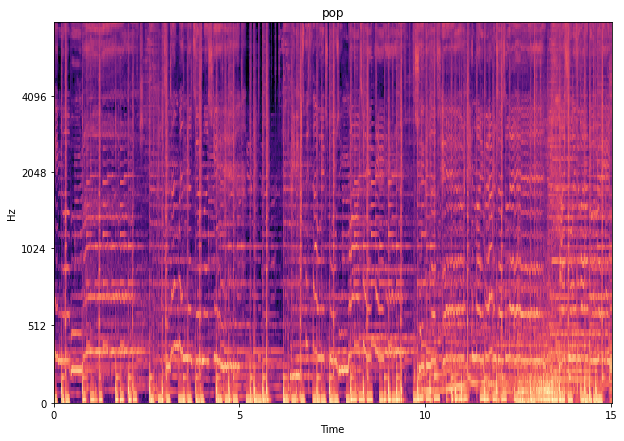

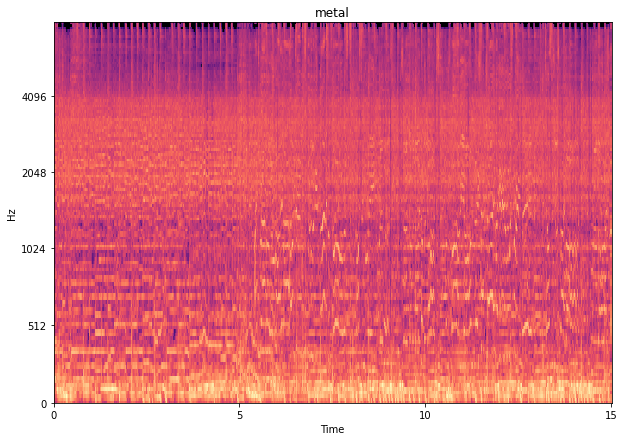

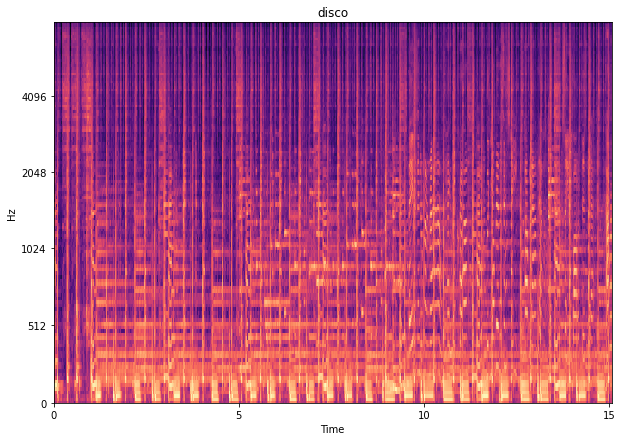

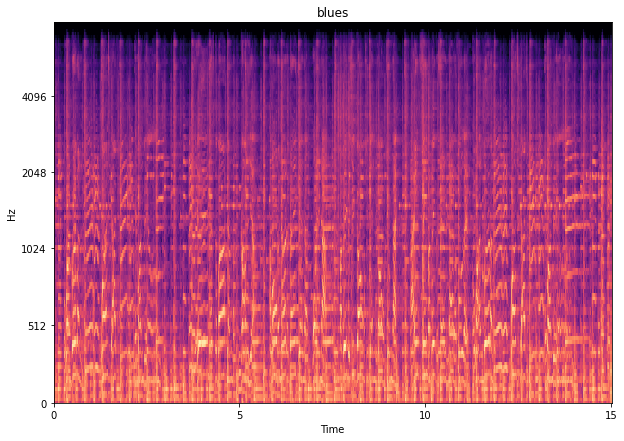

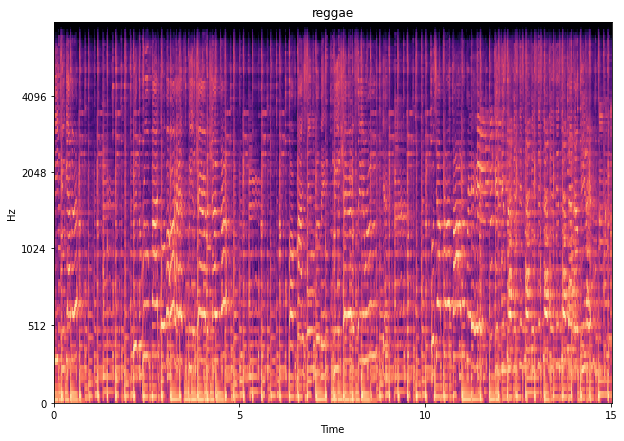

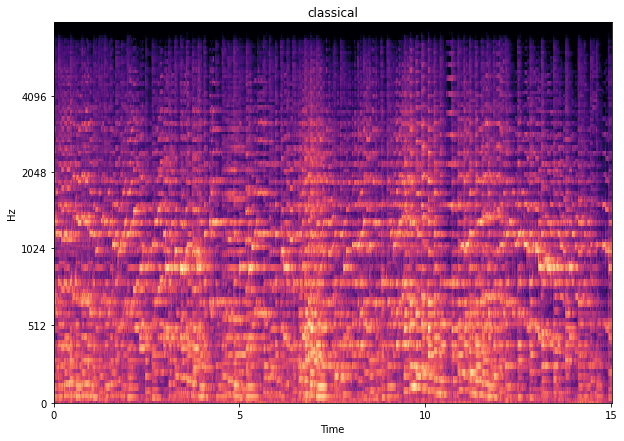

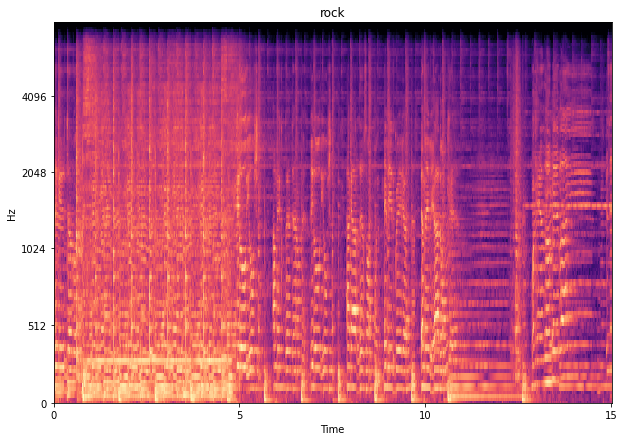

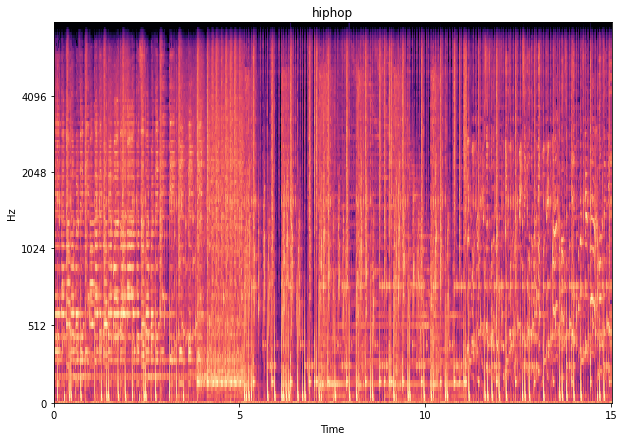

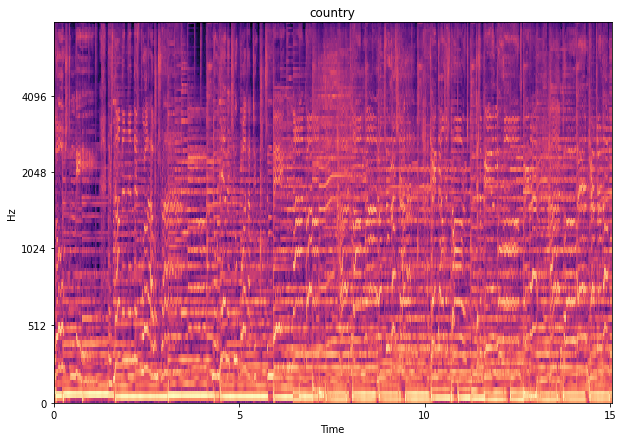

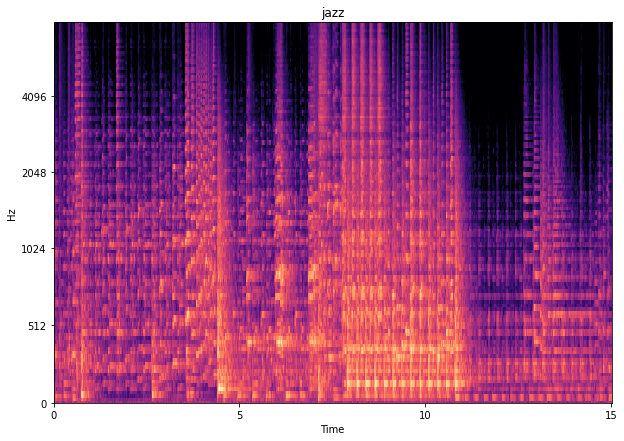

In [18]:
# Creating a list of all the genres
genres = list(df['labels'].unique())

# Plotting spectrogram for each genre
for genre in genres:
    plot_spectrogram(genre)

In [19]:
def spectrogram_subplots(genre):
    '''
    This function takes in a list of genres and plots a mel spectrogram for one song 
    per genre in a 5 x 2 grid.
    '''
    
    # Defining the subplots
    fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (25,10))
    ax = ax.ravel() # Turning ax into a matrix to make it easier to work with

    # Looping through the list of genres
    for i, kind in enumerate(genre):
        
        # Reading in the first file from each genre
        y, sr = librosa.core.load('../data/'+kind+'/'+kind+'.00000.wav')
        
        # Computing the mel spectrogram
        spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
        spect = librosa.power_to_db(spect, ref=np.max)
        
        # Displaying the mel spectrogram 
        librosa.display.specshow(spect, y_axis = 'mel', fmax = 8000, x_axis = 'time', ax = ax[i])
        ax[i].set_title(str(kind))

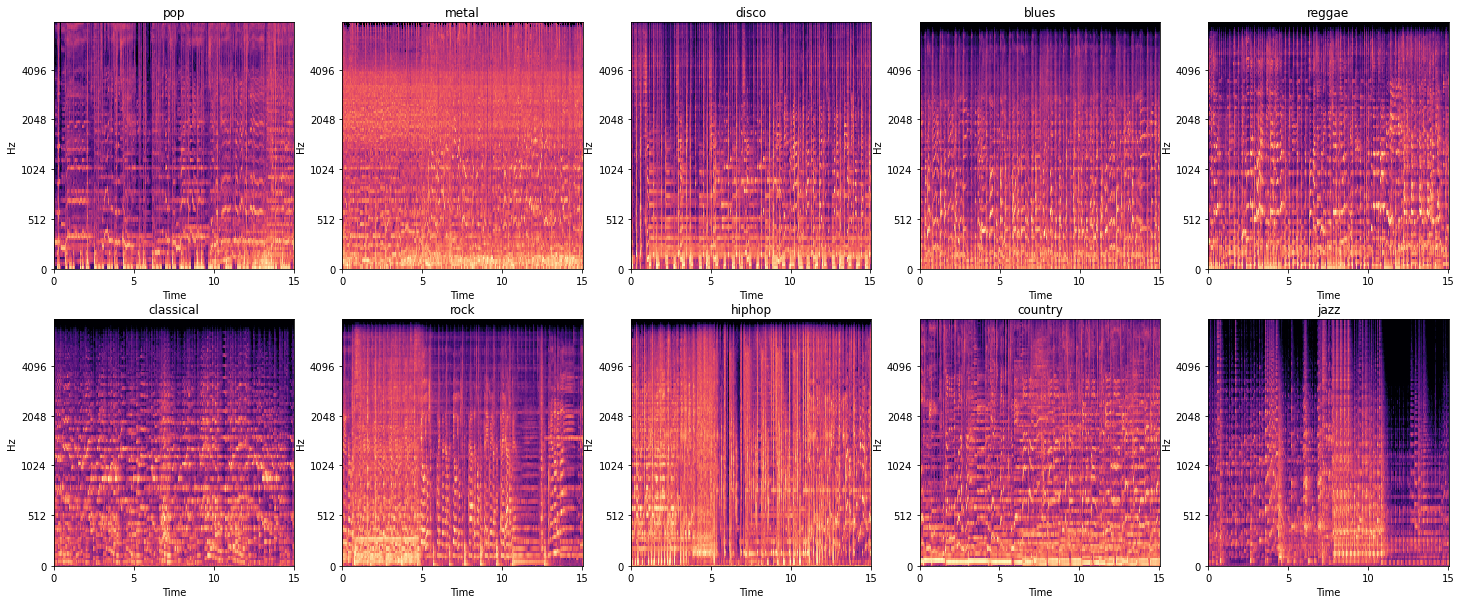

In [20]:
spectrogram_subplots(genres)

## Correlations

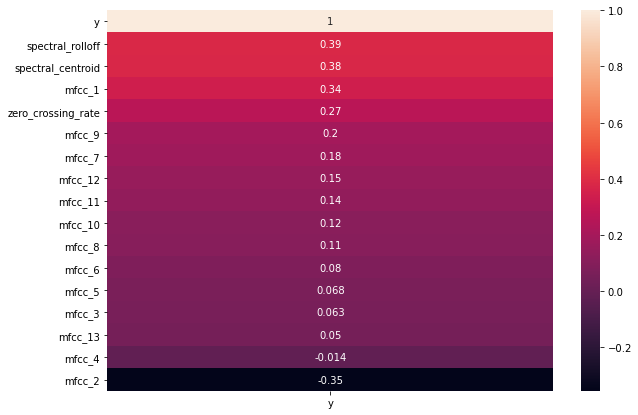

In [21]:
# Checking correlations
plt.figure(figsize=(10,7))
sns.heatmap(df.corr()[['y']].sort_values('y', ascending=False), annot=True);